In [1]:
import sympy as sp
import matplotlib.pyplot as plt
import celmech as cm
import numpy as np

# Andoyer Hamiltonian

In [2]:
delta,epsilon,C = sp.symbols("delta,epsilon,C")
A = C/(1+delta)
B = C/(1-delta)
C1 = C/(1-epsilon)
body_frame_intertia_tensor = sp.diag(A,B,C1)

# Andoyer variables
SZ,S,Lmbda = sp.symbols("S_z,S,Lambda")
h,g,l = sp.symbols("h,g,l")

from sympy import sin,cos,acos

# Hamiltonian of torque-free rigid body in Andoyer variables
Hfree = Lmbda * Lmbda / (2 * C1) 
Hfree += (sin(l)**2/A + cos(l)**2/B)/2 * (S*S - Lmbda*Lmbda)

# some functions for performing specific simplifications of trig functions
from sympy.simplify.fu import TR8,TR10,TR10i,TR11
Hfree = sp.simplify(TR8(Hfree))

In [3]:
# Symbolic expression for the Hamiltonian in Andoyer variables
Hfree

 2               2      2               2
Λ ⋅δ⋅cos(2⋅l) - Λ ⋅ε - S ⋅δ⋅cos(2⋅l) + S 
─────────────────────────────────────────
                   2⋅C                   

In [4]:
# initial state of system
h0 = 0
g0,l0 = np.random.uniform(-np.pi,np.pi,2)
S0 =  1.
Sz0 = np.cos(np.pi/3) * S0
Lmbda0 = 0.5 * S0
state = cm.PhaseSpaceState([h,g,l,SZ,S,Lmbda],[h0,g0,l0,Sz0,S0,Lmbda0])
ham = cm.Hamiltonian(Hfree,{epsilon:0.1,delta:0.03,C:1},state)

In [5]:
Nout = 512
times = np.linspace(0,100,Nout)
result = np.zeros((Nout,ham.N_dim))
for i,t in enumerate(times):
    ham.integrate(t)
    result[i] = ham.state.values

Text(0, 0.5, '$\\Lambda$')

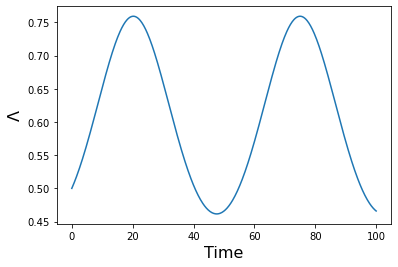

In [6]:
plt.plot(times,result[:,5])
plt.xlabel("Time",fontsize=16)
plt.ylabel("${}$".format(sp.latex(ham.qp_vars[-1])),fontsize=16)

# Andoyer + Keplerian Hamiltonian
Note that I've made no attempt make physically plausible values for moment of inertia and angular momentum values appearing in the Andoyer Hamiltonian. This will presumably require considering the units used by the rebound simulation (which are inherited by the `PoincareHamiltonian`).

In [7]:
import rebound as rb
sim= rb.Simulation()
sim.add(m=1)
sim.add(m=3e-5,a=1,e=0.1)
sim.move_to_com()
pvars = cm.Poincare.from_Simulation(sim)
pham = cm.PoincareHamiltonian(pvars)

In [8]:
h.values[:h.N_dof]

AttributeError: 'Symbol' object has no attribute 'values'

In [ ]:
Htot = pham.H + Hfree
qp_all=[]
vals_all = []
for h in [pham,ham]:
    qp_all += [q for q,p in h.qp_pairs]
    vals_all += h.values[:h.N_dof]
for h in [pham,ham]:
    qp_all += [p for q,p in h.qp_pairs]
    vals_all += h.values[h.N_dof:]

In [ ]:
pars_tot = dict()
pars_tot.update(ham.H_params)
pars_tot.update(pham.H_params)

In [ ]:
state_tot = cm.PhaseSpaceState(qp_all,vals_all)
ham_tot = cm.Hamiltonian(Htot,pars_tot,state_tot)

In [ ]:
ham_tot.H

In [ ]:
ham_tot.N_H

# Andoyer + Keplerian Hamiltonian + spin-orbit coupling
Add new terms...

# Modified Andoyer variables

In [ ]:
delta,epsilon,C = sp.symbols("delta,epsilon,C")
A = C/(1+delta)
B = C/(1-delta)
C1 = C/(1-epsilon)
body_frame_intertia_tensor = sp.diag(A,B,C1)

# Andoyer variables
SZ,S,Lmbda = sp.symbols("S_z,S,Lambda")
h,g,l = sp.symbols("h,g,l")

from sympy import sin,cos,acos

# Hamiltonian of torque-free rigid body in Andoyer variables
Hfree = Lmbda * Lmbda / (2 * C1) 
Hfree += (sin(l)**2/A + cos(l)**2/B)/2 * (S*S - Lmbda*Lmbda)

# some functions for performing specific simplifications of trig functions
from sympy.simplify.fu import TR8,TR10,TR10i,TR11
Hfree = sp.simplify(TR8(Hfree))

In [ ]:
# Symbolic expression for the Hamiltonian in Andoyer variables
Hfree

In [ ]:
# initial state of system
h0 = 0
g0,l0 = np.random.uniform(-np.pi,np.pi,2)
S0 =  1.
Sz0 = np.cos(np.pi/3) * S0
Lmbda0 = 0.5 * S0
state = cm.PhaseSpaceState([h,g,l,SZ,S,Lmbda],[h0,g0,l0,Sz0,S0,Lmbda0])
ham = cm.Hamiltonian(Hfree,{epsilon:0.1,delta:0.03,C:1},state)

In [ ]:
ham.qp_vars

In [ ]:
T = np.eye(3,dtype=int)
T[0] = [1,1,1]
T[1] = [1,1,0]
T[2] = [-1,0,0]
ct = cm.CanonicalTransformation.from_linear_angle_transformation(ham.qp_vars,T)
ham1 = ct.old_to_new_hamiltonian(ham)
ct_p2c = cm.CanonicalTransformation.polar_to_cartesian(ct.new_qp_vars,[1,2])
ham1xy = ct_p2c.old_to_new_hamiltonian(ham1)


In [ ]:
[ct.new_to_old(p) for p in ham1.qp_vars[3:]]

In [ ]:
sp.factor_terms(ham1.H)

In [ ]:
Nout = 512
times = np.linspace(0,100,Nout)
result = np.zeros((Nout,ham.N_dim))
for i,t in enumerate(times):
    ham.integrate(t)
    result[i] = ham.state.values

In [ ]:
plt.plot(times,result[:,5])
plt.xlabel("Time",fontsize=16)
plt.ylabel("${}$".format(sp.latex(ham.qp_vars[-1])),fontsize=16)